In [2]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# Loading Extended Streaming History Data
df_ext_history = pd.read_json(r'C:\Users\DELL\Downloads\Spotify Extended Streaming History\Streaming_History_Audio_2022-2024.json')  
# # # Data Cleanup
df_ext_history=df_ext_history.dropna(subset=['master_metadata_track_name','master_metadata_album_artist_name','master_metadata_album_album_name','spotify_track_uri'], how='any', axis=0)
df_ext_history=df_ext_history[['master_metadata_track_name','master_metadata_album_artist_name','master_metadata_album_album_name','ts','ms_played']]
df_ext_history.rename(columns={'ts': 'listened_time','master_metadata_album_artist_name': 'artist_name','master_metadata_track_name': 'track_name','master_metadata_album_album_name':'album'}, inplace=True)

df_ext_history['listened_time'] = pd.to_datetime(df_ext_history['listened_time'], utc=True)     # Converts the added_at column to datetime while recognizing that it is in UTC.
df_ext_history['listened_time'] = df_ext_history['listened_time'].dt.tz_localize(None)   # Remove the timezone information (convert to local time)
df_ext_history['listened_time'] = df_ext_history['listened_time'].dt.strftime('%Y-%m-%d %H:%M:%S')  # Format to display only year, month, day, and time

df_ext_history['listened_time'] = pd.to_datetime(df_ext_history['listened_time'], format='%Y-%m-%d %H:%M:%S')
df_ext_history = df_ext_history[df_ext_history['ms_played'] != 0]      
df_ext_history.reset_index(inplace=True, drop=True)
df_ext_history


,track_name,artist_name,album,listened_time,ms_played
0,Feels Like,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:02:11,152317
1,Rockland,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:04:33,141062
2,The Bottom,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:07:33,180488
3,Wishful Thinking,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:09:58,143931
4,"Boring, Happy, Beautiful",Sianon,"Boring, Happy, Beautiful",2022-02-06 22:10:08,7960
...,...,...,...,...,...
4947,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:35:14,167996
4948,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:38:02,167996
4949,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:40:51,167996
4950,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:43:39,167996


In [4]:
# Loading Liked_Songs Data
df_liked_song = pd.read_csv('C:/Users/DELL/Documents/Python_Data_Project/Spotify_Project/spotify_data.csv')
# Data Cleanup

df_liked_song['release_date'] = pd.to_datetime(df_liked_song['release_date'])

df_liked_song.rename(columns={'artist': 'artist_name','name': 'track_name'}, inplace=True)
# df_liked_song['genres'] = df_liked_song['genres'].apply(lambda x: x.split(', ') if pd.notna(x) else x)
df_liked_song.drop('added_year',axis=1,inplace=True)


In [20]:
# checking for duplicates

df_liked_song[df_liked_song.duplicated(subset=['track_name','artist_name','album'])]
df_liked_song= df_liked_song.drop_duplicates(subset=['track_name','artist_name','album'])
# df_liked_song.reset_index(inplace=True, drop=True)
df_liked_song

,track_name,artist_name,album,genres,release_date,duration_ms,popularity,added_at
0,Takes One To Know One,The Beaches,Takes One To Know One,"canadian indie rock, toronto indie",2024-07-12,167996,62,2024-08-06 14:18:25
1,What If You Change?,The Wldlfe,Turtleneck,"hopebeat, indy indie",2024-06-12,205666,27,2024-06-15 08:10:21
2,Intrusive Thoughts,Natalie Jane,Where Am I?,singer-songwriter pop,2023-11-17,201066,60,2024-06-14 13:29:27
3,Shut Up About It,Sadie Jean,Simple Like 17 (Deluxe),"alt z, singer-songwriter pop",2024-05-17,198287,49,2024-06-14 13:00:51
4,Unfinished Business (Acoustic),"NERIAH, JC Stewart",Unfinished Business (Acoustic),"alt z, singer-songwriter pop",2022-09-30,208000,47,2024-06-13 19:15:26
...,...,...,...,...,...,...,...,...
335,Not Sad Anymore,Clara Mae,Not Sad Anymore,"alt z, swedish pop",2021-06-18,195563,50,2022-02-06 22:12:04
336,Wishful Thinking,Gracie Abrams,This Is What It Feels Like,alt z,2021-11-12,160561,54,2022-02-06 22:08:46
337,The Bottom,Gracie Abrams,This Is What It Feels Like,alt z,2021-11-12,180488,59,2022-02-06 22:04:35
338,Rockland,Gracie Abrams,This Is What It Feels Like,alt z,2021-11-12,217368,60,2022-02-06 22:02:20


In [19]:
# checking for duplicates
df_ext_history[df_ext_history.duplicated(subset=['track_name','artist_name','album'])]
# df_ext_history.reset_index(inplace=True, drop=True)
df_ext_history

,track_name,artist_name,album,listened_time,ms_played
0,Feels Like,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:02:11,152317
1,Rockland,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:04:33,141062
2,The Bottom,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:07:33,180488
3,Wishful Thinking,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:09:58,143931
4,"Boring, Happy, Beautiful",Sianon,"Boring, Happy, Beautiful",2022-02-06 22:10:08,7960
...,...,...,...,...,...
4947,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:35:14,167996
4948,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:38:02,167996
4949,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:40:51,167996
4950,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:43:39,167996


In [6]:
pd.set_option('display.max.rows',40)

In [7]:

df_ext_history.merge(df_liked_song,how='left', on=['artist_name','track_name','album'])

,track_name,artist_name,album,listened_time,ms_played,genres,release_date,duration_ms,popularity,added_at
0,Feels Like,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:02:11,152317,alt z,2021-11-12,152317.0,73.0,2022-02-06 22:00:34
1,Rockland,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:04:33,141062,alt z,2021-11-12,217368.0,60.0,2022-02-06 22:02:20
2,The Bottom,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:07:33,180488,alt z,2021-11-12,180488.0,59.0,2022-02-06 22:04:35
3,Wishful Thinking,Gracie Abrams,This Is What It Feels Like,2022-02-06 22:09:58,143931,alt z,2021-11-12,160561.0,54.0,2022-02-06 22:08:46
4,"Boring, Happy, Beautiful",Sianon,"Boring, Happy, Beautiful",2022-02-06 22:10:08,7960,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4947,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:35:14,167996,"canadian indie rock, toronto indie",2024-07-12,167996.0,62.0,2024-08-06 14:18:25
4948,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:38:02,167996,"canadian indie rock, toronto indie",2024-07-12,167996.0,62.0,2024-08-06 14:18:25
4949,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:40:51,167996,"canadian indie rock, toronto indie",2024-07-12,167996.0,62.0,2024-08-06 14:18:25
4950,Takes One To Know One,The Beaches,Takes One To Know One,2024-08-06 14:43:39,167996,"canadian indie rock, toronto indie",2024-07-12,167996.0,62.0,2024-08-06 14:18:25


In [18]:
df_ext_listen_count = df_ext_history.groupby(['track_name','artist_name']).size()

# Name the count column as song_count
df_ext_listen_count = df_ext_listen_count.reset_index(name='song_count')

# Sort the values by song_count in descending order
df_ext_listen_count=df_ext_listen_count.sort_values(by='song_count', ascending=False)

df_ext_plot=df_ext_listen_count.head(10)
df_ext_plot

,track_name,artist_name,song_count
489,How To Miss You,San Joseph,60
404,Got Me Started,Troye Sivan,55
678,Love U Like That,Lauv,50
1379,permanent +1,Luz,48
645,London Is Lonely,Holly Humberstone,44
1050,Sundown (feat. Wizkid),Zara Larsson,37
737,Movie,Blake Rose,36
203,Come With Me,Surfaces,31
390,Golden,Harry Styles,30
69,At the End of the Day,Wallows,27


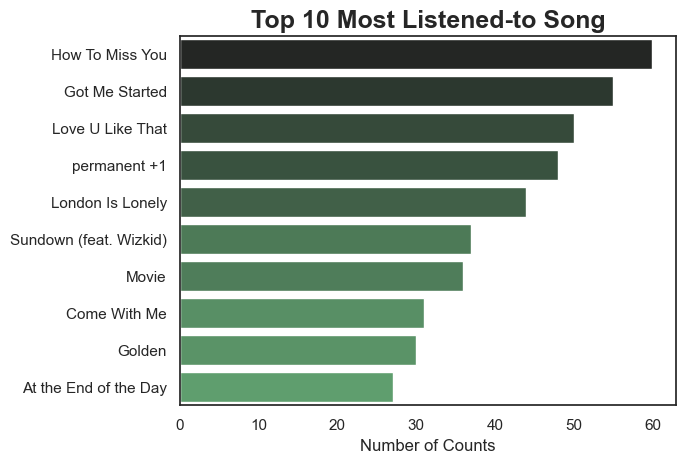

In [9]:
sns.set_theme(style='white')
sns.barplot(data=df_ext_plot, x='song_count', y='track_name', hue='song_count', palette='dark:g_r',legend=False)
plt.title('Top 10 Most Listened-to Song',fontsize=18, weight='bold')
plt.ylabel('')
plt.xlabel('Number of Counts')
plt.show()
